In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # Import joblib library

In [5]:
df=pd.read_excel(r'archive\Online Retail.xlsx')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
# Handle missing CustomerID values
df = df.dropna(subset=['CustomerID'])

# Convert CustomerID to integer
df['CustomerID'] = df['CustomerID'].astype(int)

C:\Users\harin\AppData\Local\Temp\ipykernel_30980\3685384257.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype(int)


In [9]:
# Create RFM dataframe
rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (df['InvoiceDate'].max() - date.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'UnitPrice': lambda x: (x * df['Quantity']).sum()  # Monetary
})

rfm_df.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'UnitPrice': 'Monetary'
}, inplace=True)

In [28]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])  # Scale only numerical features

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

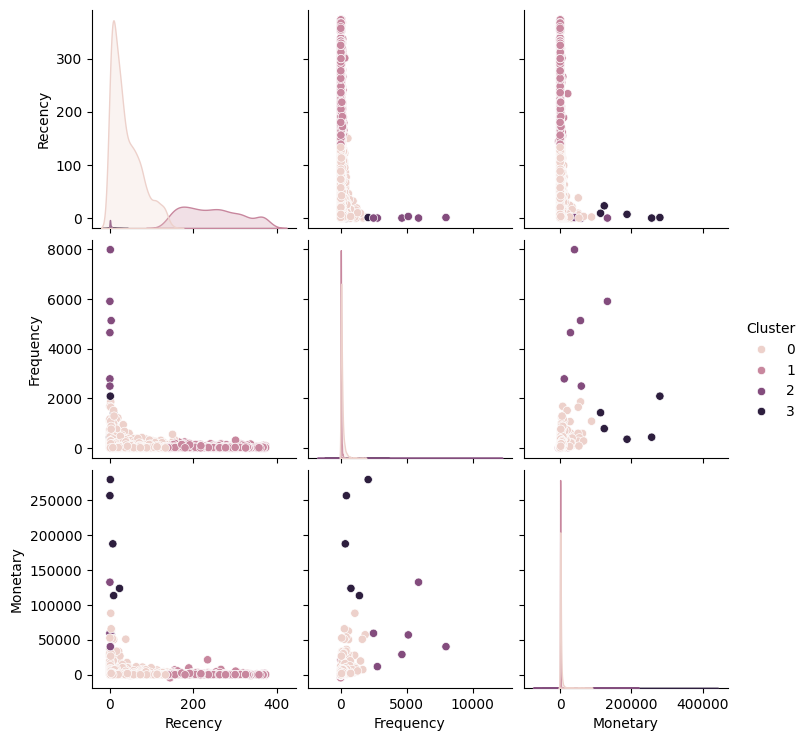

            Recency    Frequency       Monetary
Cluster                                        
0         39.027931   105.034377    1994.059792
1        245.567543    27.770626     464.787073
2          0.666667  4821.500000   55039.933333
3          8.000000  1013.400000  192103.854000


In [29]:
# Visualize the clusters
sns.pairplot(rfm_df, hue='Cluster')
plt.show()

# Analyze segments
print(rfm_df.groupby('Cluster').mean())

In [30]:
# Save the scaler and model to disk
joblib.dump(scaler, 'scaler.pkl')  # Save the scaler
joblib.dump(kmeans, 'kmeans_model.pkl')  # Save the KMeans model


['kmeans_model.pkl']

In [31]:
# Load the scaler and model from disk
scaler_loaded = joblib.load('scaler.pkl')
kmeans_loaded = joblib.load('kmeans_model.pkl')

# Example of using the loaded model and scaler
new_data = pd.DataFrame({
    'Recency': [15, 8],
    'Frequency': [3, 7],
    'Monetary': [300, 700]
})

# Scale the new data using the loaded scaler
new_data_scaled = scaler_loaded.transform(new_data)

# Predict the cluster for the new data using the loaded KMeans model
predictions = kmeans_loaded.predict(new_data_scaled)
print("Predicted Clusters:", predictions)


Predicted Clusters: [0 0]
